In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
# Descargar los datos históricos de AAPL
data = yf.download('NVDA', start='2019-01-01', end='2024-08-01')

# Mostrar las primeras filas del DataFrame
print(data.head())

[*********************100%%**********************]  1 of 1 completed

               Open     High      Low    Close  Adj Close     Volume
Date                                                                
2019-01-02  3.26600  3.46200  3.25125  3.40550   3.378612  508752000
2019-01-03  3.34475  3.37900  3.19225  3.19975   3.174486  705552000
2019-01-04  3.27350  3.44325  3.24250  3.40475   3.377868  585620000
2019-01-07  3.46250  3.62225  3.41075  3.58500   3.556694  709160000
2019-01-08  3.66725  3.66950  3.42250  3.49575   3.468150  786016000


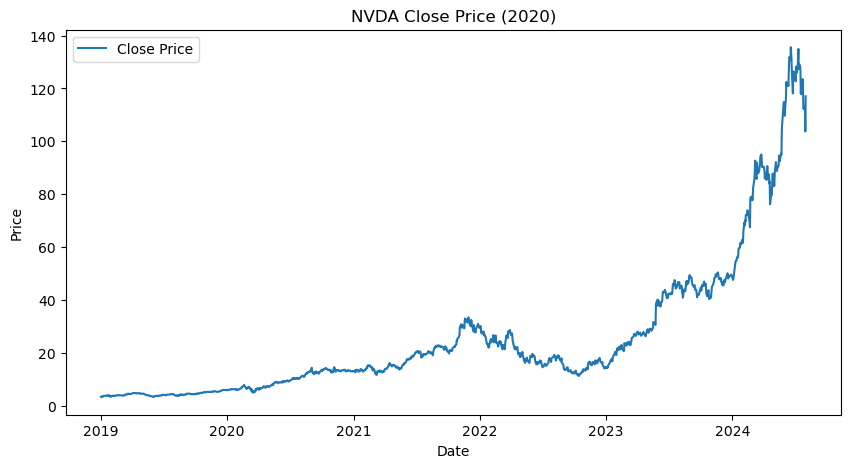

In [7]:
# Graficar los precios de cierre
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Close'], label='Close Price')
plt.title('NVDA Close Price (2020)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed

Epoch 1/5



/Users/tomasa.c/anaconda3/envs/ML/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0481
Epoch 2/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0018
Epoch 3/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0012
Epoch 4/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0012
Epoch 5/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0011
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━

[*********************100%%**********************]  1 of 1 completed


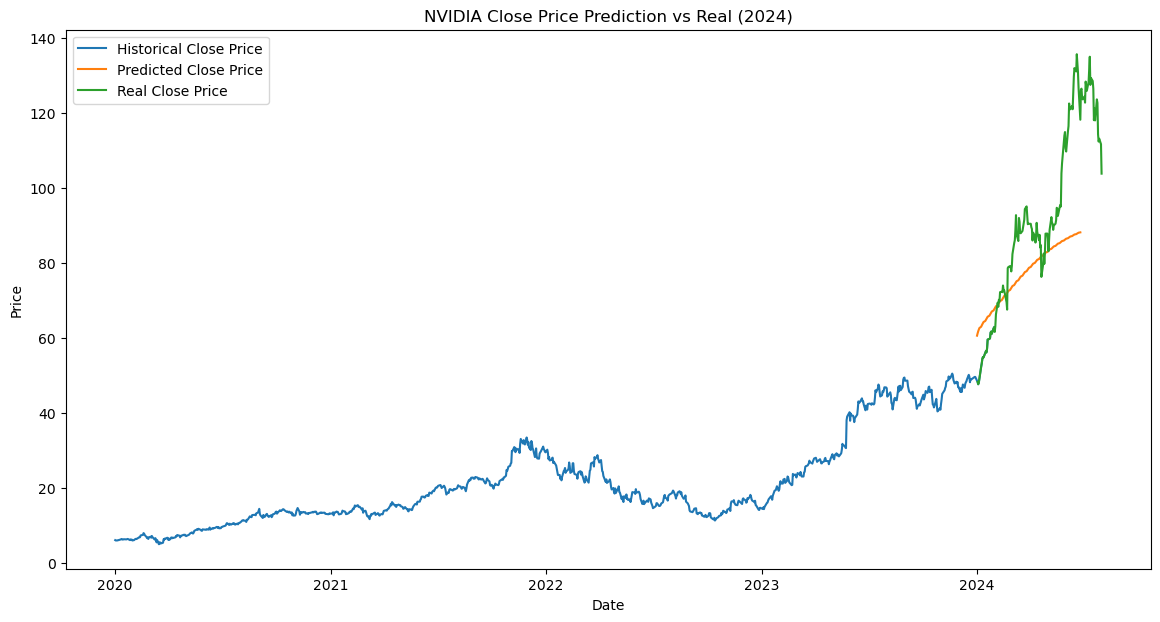

In [17]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Descargar datos históricos de NVIDIA desde 2020 hasta 2024
data = yf.download('NVDA', start='2020-01-01', end='2024-01-31')
close_prices = data['Close']

# Preprocesamiento de datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices.values.reshape(-1, 1))

# Preparar datos para LSTM
look_back = 60
X_train, y_train = [], []
for i in range(look_back, len(scaled_data)):
    X_train.append(scaled_data[i-look_back:i, 0])
    y_train.append(scaled_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Crear el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Preparar datos para predicciones de 2024
test_data = scaled_data[-look_back:]
test_data = np.reshape(test_data, (1, test_data.shape[0], 1))

# Hacer predicciones para los próximos 6 meses
predictions = []
for _ in range(6 * 21):  # Aproximadamente 21 días de negociación por mes
    predicted_price = model.predict(test_data)
    predictions.append(predicted_price[0, 0])
    new_test_data = np.append(test_data[0, 1:], predicted_price)
    test_data = np.reshape(new_test_data, (1, look_back, 1))

# Desescalar las predicciones
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Descargar datos reales desde enero hasta julio de 2024 para la comparación
real_data = yf.download('NVDA', start='2024-01-01', end='2024-07-31')
real_prices = real_data['Close'].values

# Crear un rango de fechas para las predicciones
prediction_dates = pd.date_range(start='2024-01-01', periods=len(predictions), freq='B')

# Graficar los resultados
plt.figure(figsize=(14, 7))
plt.plot(data.index, close_prices, label='Historical Close Price')
plt.plot(prediction_dates, predictions, label='Predicted Close Price')
plt.plot(real_data.index, real_prices, label='Real Close Price')
plt.title('NVIDIA Close Price Prediction vs Real (2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed

Epoch 1/50



/Users/tomasa.c/anaconda3/envs/ML/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - loss: 0.2580 - val_loss: 0.1037
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0710 - val_loss: 0.0990
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0407 - val_loss: 0.0251
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.0109 - val_loss: 0.0058
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0113 - val_loss: 0.0415
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0116 - val_loss: 0.0287
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0066 - val_loss: 0.0075
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0075 - val_loss: 0.0144
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0062 - val_loss: 0.0271
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0059 - val_loss: 0.0139
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0056 - val_loss: 0.0124
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.0051 - val_loss: 0.0253
Ep

[*********************100%%**********************]  1 of 1 completed


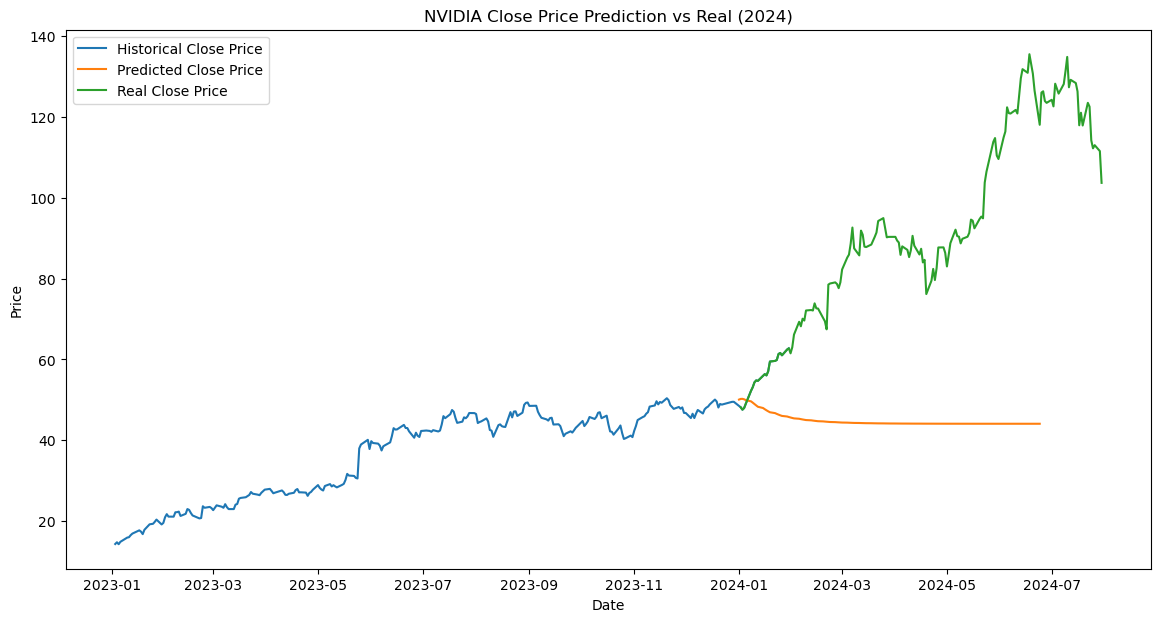

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Descargar datos históricos de NVIDIA desde 2020 hasta 2024
data = yf.download('NVDA', start='2023-01-01', end='2024-01-31')
close_prices = data['Close']

# Preprocesamiento de datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices.values.reshape(-1, 1))

# Preparar datos para LSTM con una ventana de tiempo más larga
look_back = 100
X_train, y_train = [], []
for i in range(look_back, len(scaled_data)):
    X_train.append(scaled_data[i-look_back:i, 0])
    y_train.append(scaled_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Crear el modelo LSTM con más capas y dropout
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Preparar datos para predicciones de 2024
test_data = scaled_data[-look_back:]
test_data = np.reshape(test_data, (1, test_data.shape[0], 1))

# Hacer predicciones para los próximos 6 meses
predictions = []
for _ in range(6 * 21):  # Aproximadamente 21 días de negociación por mes
    predicted_price = model.predict(test_data)
    predictions.append(predicted_price[0, 0])
    new_test_data = np.append(test_data[0, 1:], predicted_price)
    test_data = np.reshape(new_test_data, (1, look_back, 1))

# Desescalar las predicciones
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Descargar datos reales desde enero hasta julio de 2024 para la comparación
real_data = yf.download('NVDA', start='2024-01-01', end='2024-07-31')
real_prices = real_data['Close'].values

# Crear un rango de fechas para las predicciones
prediction_dates = pd.date_range(start='2024-01-01', periods=len(predictions), freq='B')

# Graficar los resultados
plt.figure(figsize=(14, 7))
plt.plot(data.index, close_prices, label='Historical Close Price')
plt.plot(prediction_dates, predictions, label='Predicted Close Price')
plt.plot(real_data.index, real_prices, label='Real Close Price')
plt.title('NVIDIA Close Price Prediction vs Real (2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()